<a href="https://colab.research.google.com/github/flexycode/CCMACLRL_EXERCISES_COM231ML/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🤖 Exercise 3

Use logistic regression to predict the probability of a passenger surviving.

https://www.kaggle.com/competitions/titanic/overview

# Step 1: Install and Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

## Set up plotting style

In [9]:
plt.style.use('default')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


# Step 2: Load the Data

## Dataset File

In [10]:
dataset_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES_OLD/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/train.csv?raw=true'
df = pd.read_csv(dataset_url)

print("\n📊 Step 2: Loading the data...")


📊 Step 2: Loading the data...


## Training Data

In [11]:
train_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES_OLD/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/train.csv?raw=true'
df = pd.read_csv(train_url)

## Test File

In [12]:
test_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES_OLD/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/test.csv?raw=true'
dt = pd.read_csv(test_url)

print(f"✅ Training data loaded: {df.shape} rows, {df.shape[1]} columns")
print(f"✅ Test data loaded: {dt.shape} rows, {dt.shape[1]} columns")

✅ Training data loaded: (891, 12) rows, 12 columns
✅ Test data loaded: (418, 11) rows, 11 columns


# Step 3: Explore the Data

In [13]:
print("\n🔍 Step 3: Exploring the data...")

print("First 5 rows of training data:")
print(df.head())

print("\nBasic information about training data:")
print(df.info())

print("\nMissing values in training data:")
print(df.isnull().sum())

print("\nSurvival rate:")
print(f"Overall survival: {df['Survived'].mean():.2%}")


🔍 Step 3: Exploring the data...
First 5 rows of training data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123   

## Simple Visualizations

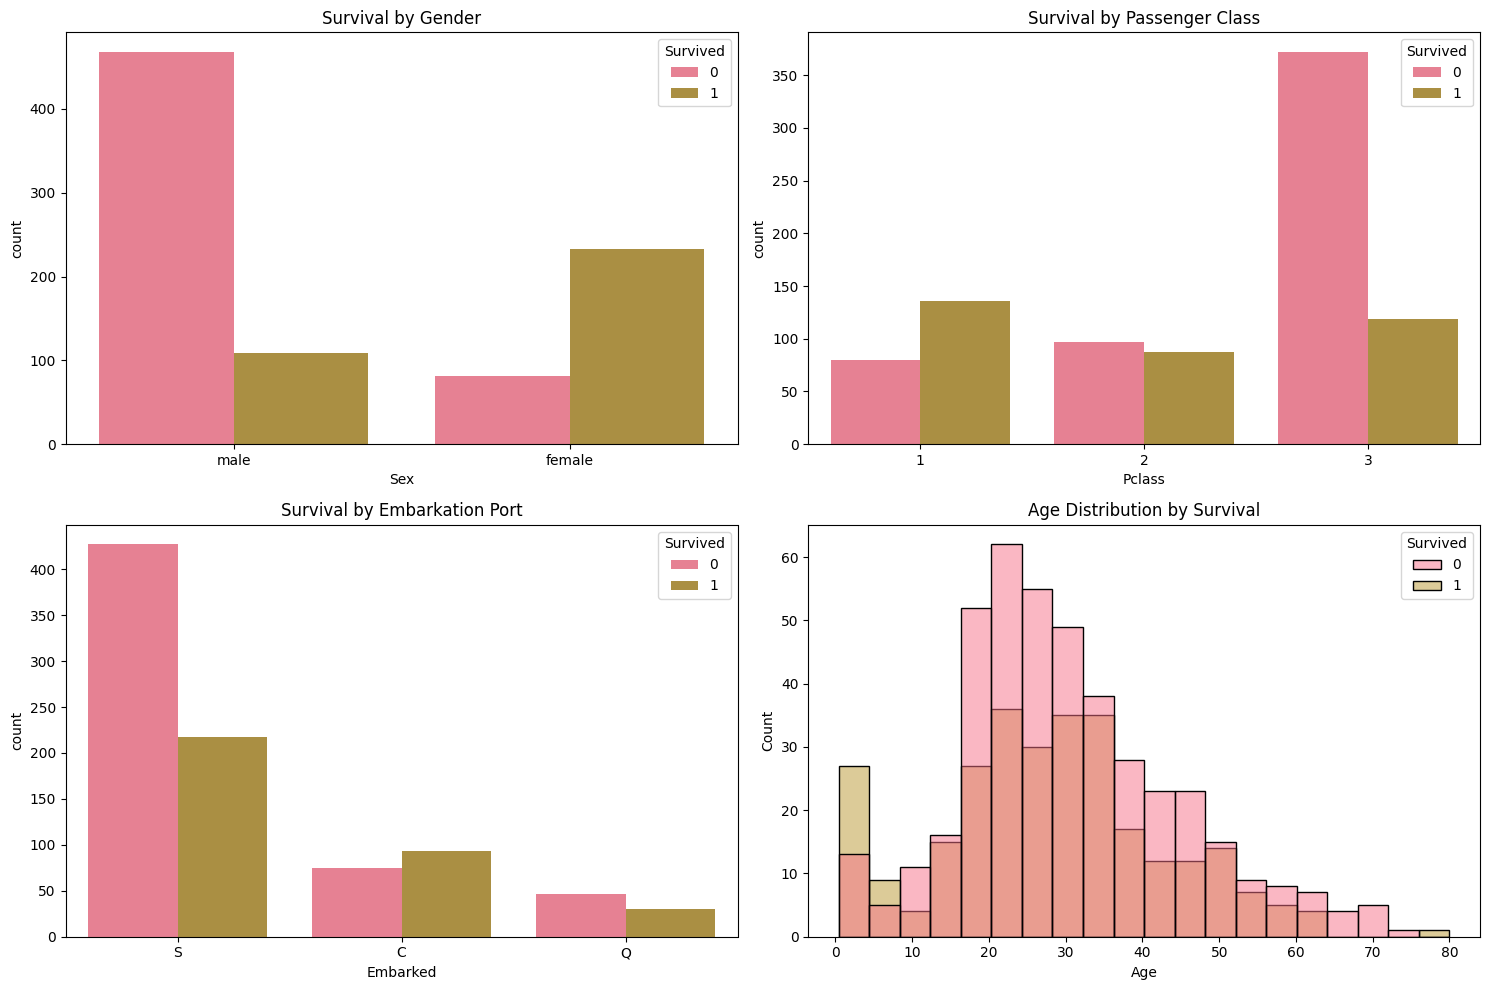

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Survival by Gender
sns.countplot(data=df, x='Sex', hue='Survived', ax=axes[0,0])
axes[0,0].set_title('Survival by Gender')

# Plot 2: Survival by Class
sns.countplot(data=df, x='Pclass', hue='Survived', ax=axes[0,1])
axes[0,1].set_title('Survival by Passenger Class')

# Plot 3: Survival by Embarkation Port
sns.countplot(data=df, x='Embarked', hue='Survived', ax=axes[1,0])
axes[1,0].set_title('Survival by Embarkation Port')

# Plot 4: Age Distribution
sns.histplot(data=df, x='Age', hue='Survived', ax=axes[1,1])
axes[1,1].set_title('Age Distribution by Survival')

plt.tight_layout()
plt.show()

# Step 4: Data Cleaning and Feature Engineering

In [21]:
print("\n🧹 Step 4: Cleaning data and creating new features...")

# Create copies to avoid modifying original data
train_data = df.copy()
test_data = dt.copy()



🧹 Step 4: Cleaning data and creating new features...


## Fill missing values

In [25]:
print("Filling missing values...")


Filling missing values...


### Age - fill with media





In [28]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

/tmp/ipython-input-68677200.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
/tmp/ipython-input-68677200.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

### Embarked - fill with most common value

In [27]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-3451707845.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
/tmp/ipython-input-3451707845.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

### Fare - fill with median

In [29]:
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

/tmp/ipython-input-2536658624.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)


## Create new features

In [30]:
print("Creating new features...")

# Family size
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

# Is alone
train_data['IsAlone'] = (train_data['FamilySize'] == 1).astype(int)
test_data['IsAlone'] = (test_data['FamilySize'] == 1).astype(int)

# Title from name
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\\.', expand=False)
test_data['Title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\\.', expand=False)

# Simplify titles
common_titles = ['Mr', 'Miss', 'Mrs', 'Master']
train_data['Title'] = train_data['Title'].apply(lambda x: x if x in common_titles else 'Rare')
test_data['Title'] = test_data['Title'].apply(lambda x: x if x in common_titles else 'Rare')

print("✅ Data cleaning and feature engineering completed!")

Creating new features...
✅ Data cleaning and feature engineering completed!


# Step 5: Prepare Data for Modeling

In [32]:
print("\n🎯 Step 5: Preparing data for modeling...")

# Select features to use
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'Title']

# Prepare training data
X = train_data[features]
y = train_data['Survived']

# Prepare test data
X_test = test_data[features]

print(f"Training features: {X.shape}")
print(f"Test features: {X_test.shape}")

# Encode categorical variables
print("Encoding categorical variables...")

categorical_cols = ['Sex', 'Embarked', 'Title']

# Create label encoders
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    # Fit on training data
    X[col] = le.fit_transform(X[col].astype(str))
    # Transform test data (using same encoder)
    X_test[col] = le.transform(X_test[col].astype(str))
    label_encoders[col] = le

print("✅ Data preparation completed!")


🎯 Step 5: Preparing data for modeling...
Training features: (891, 10)
Test features: (418, 10)
Encoding categorical variables...
✅ Data preparation completed!


/tmp/ipython-input-3271013347.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
/tmp/ipython-input-3271013347.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = le.transform(X_test[col].astype(str))
/tmp/ipython-input-3271013347.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

# Step 6: Split Data and Scale Features

In [33]:
print("\n⚖️ Step 6: Splitting data and scaling features...")

# Split training data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("✅ Data scaling completed!")



⚖️ Step 6: Splitting data and scaling features...
Training set: (712, 10)
Validation set: (179, 10)
✅ Data scaling completed!


# Step 7: Train the Logistic Regression Model

In [34]:
print("\n🤖 Step 7: Training the logistic regression model...")

# Create and train model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

print("✅ Model training completed!")


🤖 Step 7: Training the logistic regression model...
✅ Model training completed!


# Step 8: Evaluate the Model

In [35]:
print("\n📊 Step 8: Evaluating the model...")

# Make predictions on validation set
y_val_pred = model.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Validation Accuracy: {val_accuracy:.4f} ({val_accuracy:.2%})")


📊 Step 8: Evaluating the model...
Validation Accuracy: 0.8101 (81.01%)


## Show feature importance


Feature Importance:
      Feature  Importance
1         Sex    1.252101
0      Pclass    0.858324
2         Age    0.412191
8     IsAlone    0.317549
3       SibSp    0.301260
7  FamilySize    0.234061
6    Embarked    0.157205
9       Title    0.128270
5        Fare    0.071719
4       Parch    0.062496


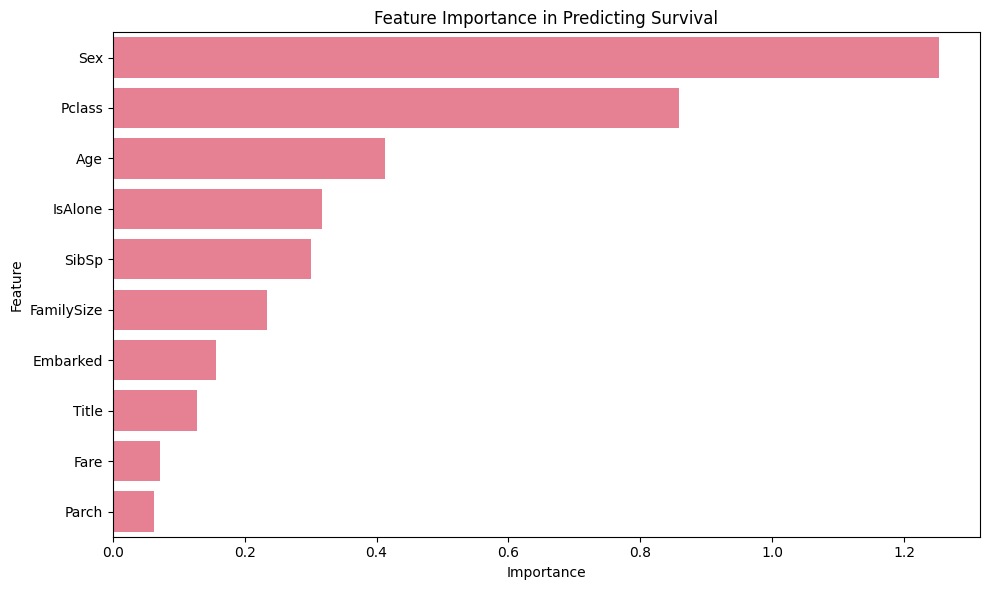

In [36]:
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': abs(model.coef_[0])
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title('Feature Importance in Predicting Survival')
plt.tight_layout()
plt.show()

# Step 9: Make Final Predictions

In [37]:
print("\n🎯 Step 9: Making final predictions on test data...")

# Train final model on all training data
final_model = LogisticRegression(random_state=42, max_iter=1000)
final_model.fit(scaler.transform(X), y)

# Predict on test data
test_predictions = final_model.predict(X_test_scaled)

print(f"Number of survivors predicted: {test_predictions.sum()} out of {len(test_predictions)}")
print(f"Survival rate in predictions: {test_predictions.mean():.2%}")


🎯 Step 9: Making final predictions on test data...
Number of survivors predicted: 158 out of 418
Survival rate in predictions: 37.80%


# Step 10: Create Submission File

In [38]:
print("\n💾 Step 10: Creating submission file...")

# Create submission dataframe
submission_df = pd.DataFrame({
    'PassengerId': dt['PassengerId'],
    'Survived': test_predictions
})


💾 Step 10: Creating submission file...


## Generate Results and Save to CSV

In [48]:
submission_df.to_csv('submission_file.csv', index=False)

print("✅ Submission file created: 'submission_file.csv'")
print("\nFirst 10 predictions:")
print(submission_df.head(10))

print(f"\n📈 Final Results Summary:")
print(f"- Training data: {df.shape[0]} passengers")
print(f"- Test data: {dt.shape[0]} passengers")
print(f"- Validation accuracy: {val_accuracy:.2%}")
print(f"- Predicted survivors: {test_predictions.sum()}")
print(f"- Predicted survival rate: {test_predictions.mean():.2%}")


# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")

✅ Submission file created: 'submission_file.csv'

First 10 predictions:
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1
5          897         0
6          898         1
7          899         0
8          900         1
9          901         0

📈 Final Results Summary:
- Training data: 891 passengers
- Test data: 418 passengers
- Validation accuracy: 81.01%
- Predicted survivors: 158
- Predicted survival rate: 37.80%
Submission file created: submission_file.csv


## Sample Submission File

In [43]:
sample_submission_url ='https://github.com/robitussin/CCMACLRL_EXERCISES_OLD/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/gender_submission.csv?raw=true'

sf=pd.read_csv(sample_submission_url)

In [41]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  418 non-null    int64
dtypes: int64(1)
memory usage: 3.4 KB


## Bonus : See Probabilities

In [49]:
test_probabilities = final_model.predict_proba(X_test_scaled)

print("🔮 Survival probabilities for first 10 passengers:")
for i in range(10):
    prob = test_probabilities[i][1]
    pred = test_predictions[i]
    print(f"Passenger {i+1}: {prob:.1%} → {'SURVIVED' if pred == 1 else 'DIED'}")

🔮 Survival probabilities for first 10 passengers:
Passenger 1: 8.7% → DIED
Passenger 2: 43.5% → DIED
Passenger 3: 10.4% → DIED
Passenger 4: 9.1% → DIED
Passenger 5: 56.3% → SURVIVED
Passenger 6: 13.0% → DIED
Passenger 7: 65.9% → SURVIVED
Passenger 8: 23.1% → DIED
Passenger 9: 66.9% → SURVIVED
Passenger 10: 8.4% → DIED
